In [18]:
from PyPDF2 import PdfReader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import google.generativeai as genai
from langchain.vectorstores import FAISS
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains.question_answering import load_qa_chain
from langchain.prompts import PromptTemplate
from langchain.prompts import ChatPromptTemplate
from dotenv import load_dotenv


load_dotenv()
os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))



In [12]:
def poop(context):
    poompt = '''
Can you give me 10 quiz questions based on {}, i want it in specific json file format, like -   
[
    {{
        "question": "(Question)",
        "options": (["option1", "option2", "option3", "option4"]),
        "answer": "(answer here)"
    }},
    {{
        "question": "What is 2 + 2?",
        "options": ["3", "4", "5", "6"],
        "answer": "B"
    }},
    {{
        "question": "What is the largest planet in our solar system?",
        "options": ["Earth", "Venus", "Jupiter", "Mars"],
        "answer": "C"
    }}
]
'''.format(context)
    return poompt

# poompt = poop('hey')
# print(poompt)


In [13]:
pro=poop('chapter 1')

In [19]:
pro

'\nCan you give me 10 quiz questions based on chapter 1, i want it in specific json file format, like -   \n[\n    {\n        "question": "(Question)",\n        "options": (["option1", "option2", "option3", "option4"]),\n        "answer": "(answer here)"\n    },\n    {\n        "question": "What is 2 + 2?",\n        "options": ["3", "4", "5", "6"],\n        "answer": "B"\n    },\n    {\n        "question": "What is the largest planet in our solar system?",\n        "options": ["Earth", "Venus", "Jupiter", "Mars"],\n        "answer": "C"\n    }\n]\n'

In [25]:
icon="📝"
print((icon))

📝


In [20]:
from pdf_chat import con_for_ques

que_p=con_for_ques(pro)
que_p

RuntimeError: Error in __cdecl faiss::FileIOReader::FileIOReader(const char *) at D:\a\faiss-wheels\faiss-wheels\faiss\faiss\impl\io.cpp:68: Error: 'f' failed: could not open faiss_index\index.faiss for reading: No such file or directory

In [1]:
from dotenv import load_dotenv
import os
load_dotenv()
import google.generativeai as genai
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))
model = genai.GenerativeModel('gemini-pro')

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import display
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
response = model.generate_content('tell me something about history of india')

In [4]:
to_markdown(response.text)

> **Ancient India (c. 3300 BCE - 500 BCE)**
> 
> * Indus Valley Civilization (c. 3300 - 1900 BCE): Flourished in the northwestern part of the Indian subcontinent, with advanced urban centers, a written script, and a sophisticated society.
> * Vedic Period (c. 1500 - 500 BCE): Aryans migrated to India and established a society based on the Vedas, a collection of religious hymns and texts.
> * Mahajanapadas (c. 600 - 322 BCE): Sixteen major states emerged, including Magadha, which would later become the Mauryan Empire.
> 
> **Classical India (c. 500 BCE - 1200 CE)**
> 
> * **Mauryan Empire (c. 322 - 180 BCE):** Led by Chandragupta Maurya, this empire unified most of the Indian subcontinent and established a centralized government.
> * **Gupta Empire (c. 320 - 550 CE):** A golden age of Indian history, characterized by political stability, economic prosperity, and cultural and intellectual achievements.
> * **Medieval India (c. 1200 - 1526 CE)**
> * **Delhi Sultanate (1206 - 1526 CE):** Founded by the Delhi Mamluks, this Muslim dynasty ruled over much of North India.
> * **Bahmani Sultanate (1347 - 1527 CE):** A Deccan-based Muslim dynasty that broke away from the Delhi Sultanate and established a powerful kingdom.
> * **Vijayanagara Empire (1336 - 1646 CE):** A Hindu empire in South India that resisted Muslim invasions and flourished in the fields of art, architecture, and literature.
> 
> **Mughal Empire (1526 - 1857 CE)**
> 
> * **Babur (1526 - 1530):** Founded the Mughal Empire after invading India from Central Asia.
> * **Akbar (1556 - 1605):** Expanded the empire, introduced reforms, and established a tolerant religious policy.
> * **Shah Jahan (1628 - 1658):** Built the Taj Mahal as a mausoleum for his wife, Mumtaz Mahal.
> 
> **British Colonial Period (1757 - 1947)**
> 
> * **East India Company (1757 - 1857):** A British trading company that gradually acquired political power in India.
> * **Indian Mutiny (1857 - 1858):** A widespread rebellion against British rule, which resulted in the establishment of direct British colonial rule.
> * **Indian National Movement (Late 19th century - 1947):** Led by figures such as Mahatma Gandhi, the movement advocated for Indian independence through nonviolent resistance.
> 
> **Independent India (1947 - Present)**
> 
> * **Partition of India (1947):** British India was partitioned into India and Pakistan, resulting in widespread violence and displacement.
> * **Nehru Era (1947 - 1964):** Jawaharlal Nehru became the first Prime Minister of independent India and established a secular and democratic state.
> * **Green Revolution (1960s - 1970s):** Agricultural reforms that helped increase food production in India.
> * **Economic Liberalization (1991):** Reforms that liberalized the Indian economy and led to rapid economic growth.
> * **21st Century:** India continues to face challenges such as poverty, inequality, and communalism, while also making significant progress in areas such as technology, education, and healthcare.

In [6]:
import json
import matplotlib.pyplot as plt

# Load data from JSON files
with open(r'D:\Github\Edu-AiX\Jsons\ques.json', 'r') as f:
    questions_data = json.load(f)

with open(r'D:\Github\Edu-AiX\Jsons\answer_sheet.json', 'r') as f:
    answer_sheet_data = json.load(f)

# Function to calculate the result for a student
def calculate_result(answers, correct_answers):
    correct_count = 0
    for index, answer in answers.items():
        if answer == correct_answers[index]["answer"]:
            correct_count += 1
    return correct_count

# Calculate result for each student
results = {}
for student_id, answers in answer_sheet_data.items():
    results[student_id] = calculate_result(answers, questions_data)

# Plot pie chart for number of correct vs wrong answers
for student_id, result in results.items():
    plt.figure(figsize=(6, 6))
    labels = ['Correct Answers', 'Wrong Answers']
    sizes = [result, len(questions_data) - result]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Result for Student {student_id}')
    plt.axis('equal')
    plt.show()

# Plot visualization for time spent on individual questions for each student
for student_id, answers in answer_sheet_data.items():
    plt.figure(figsize=(10, 6))
    plt.bar(answers.keys(), [answer['time_taken'] for answer in answers.values()], color='skyblue')
    plt.xlabel('Question Number')
    plt.ylabel('Time Taken (seconds)')
    plt.title(f'Time Spent on Individual Questions for Student {student_id}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


TypeError: list indices must be integers or slices, not str

In [14]:
import json
import matplotlib.pyplot as plt

# Load data from JSON files
with open(r'D:\Github\Edu-AiX\Jsons\ques.json', 'r') as f:
    questions_data = json.load(f)

with open(r'D:\Github\Edu-AiX\Jsons\answer_sheet.json', 'r') as f:
    answer_sheet_data = json.load(f)

In [31]:
def cal_marks(qd,ad):
    ak=[]
    sk=[]
    res_list=[]
    
    for i in qd:
        # print(i['answer'])
        ak.append(i['answer'])
        
    for i2 in ad:
        td=ad[i2]
        sk.append(td['answer'][:1])
        
    for idx,ca in enumerate(ak):
        if ca==sk[idx]:
            res_list.append(1)
            
        else:
            res_list.append(0)
    return res_list

In [38]:
mrk=cal_marks(questions_data,answer_sheet_data)
mrk[5]=1

In [35]:
que_time=[]
for i2 in answer_sheet_data:
    td=answer_sheet_data[i2]
    que_time.append(td['time_taken'])

print(que_time)

[3.6610138416290283, 1.4539682865142822, 1.0075528621673584, 1.1228911876678467, 0.824592113494873, 0.7959856986999512, 1.120866298675537, 0.8762173652648926, 1.2450501918792725, 1.1834957599639893]


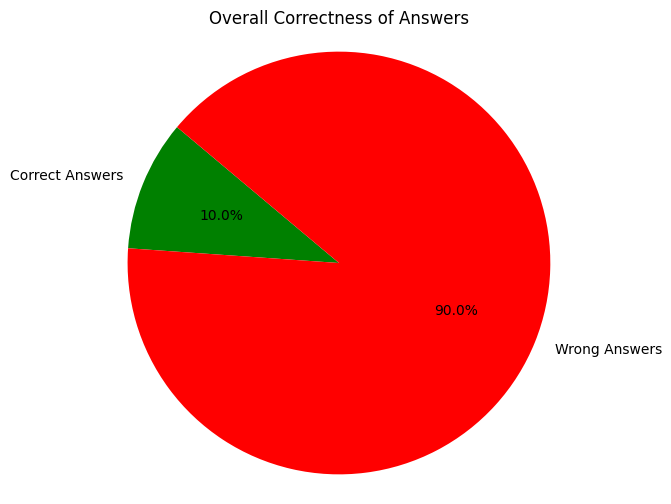

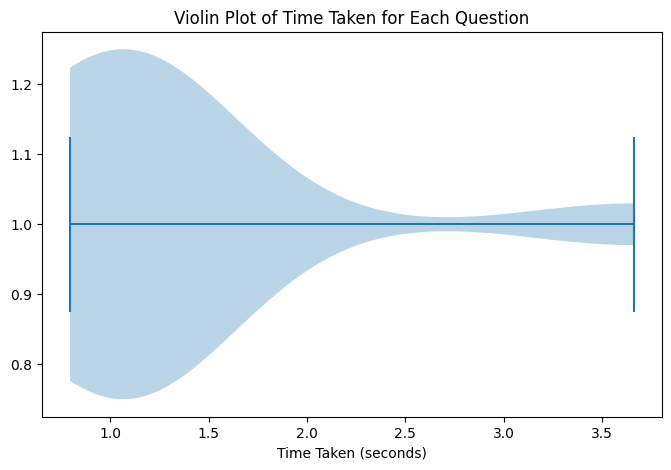

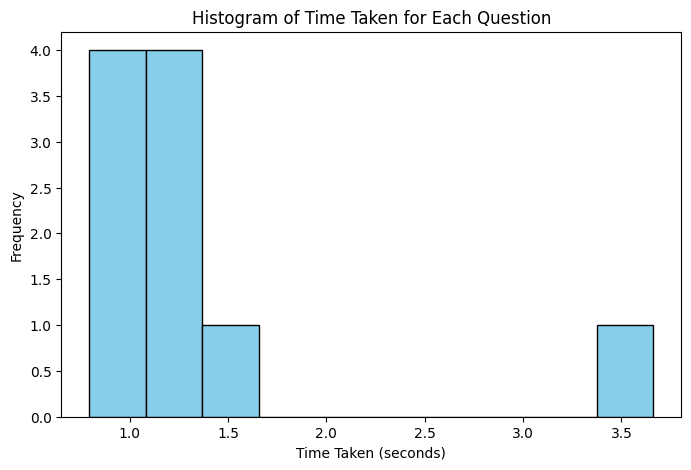

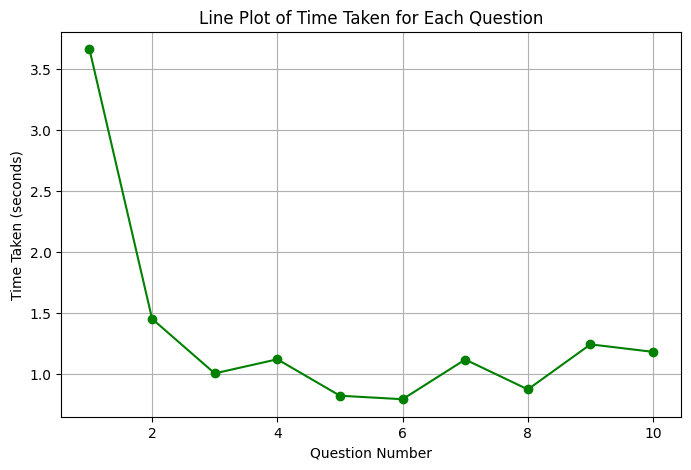

In [44]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Example lists (replace these with your actual lists)
marks = mrk
q_time = que_time


# Pie chart for the overall correctness
correct_count = sum(marks)
wrong_count = len(marks) - correct_count
plt.figure(figsize=(6, 6))
labels = ['Correct Answers', 'Wrong Answers']
sizes = [correct_count, wrong_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Overall Correctness of Answers')
plt.axis('equal')
plt.show()

# Violin plot for time taken
plt.figure(figsize=(8, 5))
plt.violinplot(q_time, vert=False)
plt.xlabel('Time Taken (seconds)')
plt.title('Violin Plot of Time Taken for Each Question')
plt.show()

# Histogram for time taken
plt.figure(figsize=(8, 5))
plt.hist(q_time, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Taken for Each Question')
plt.show()

# Line plot for time taken
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(q_time)+1), q_time, marker='o', color='green')
plt.xlabel('Question Number')
plt.ylabel('Time Taken (seconds)')
plt.title('Line Plot of Time Taken for Each Question')
plt.grid(True)
plt.show()

# Heatmap for time taken
plt.figure(figsize=(8, 5))
heatmap_data = np.array([q_time, marks])
plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Time Taken (seconds)')
plt.xlabel('Question Number')
plt.ylabel('Correctness (1 for Correct, 0 for Wrong)')
plt.title('Heatmap of Time Taken for Each Question')
plt.show()

# Scatter plot with color encoding for correctness of answers
plt.figure(figsize=(8, 5))
plt.scatter(range(1, len(q_time)+1), q_time, c=marks, cmap='coolwarm')
plt.colorbar(label='Correctness (1 for Correct, 0 for Wrong)')
plt.xlabel('Question Number')
plt.ylabel('Time Taken (seconds)')
plt.title('Scatter Plot of Time Taken with Color Encoding for Correctness')
plt.show()


In [62]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Example lists (replace these with your actual lists)
marks = mrk
q_time = que_time

text='''
Congratulations on completing your test! 

Remember, every challenge you face is an opportunity to learn and grow. 
Keep pushing yourself, and believe in your abilities. 
Your determination and hard work will surely lead to even greater success in the future.
Stay focused, stay motivated, and never give up. You're capable of achieving amazing things! 

Best wishes for your next endeavor! 
'''

# Create a PDF file
with PdfPages('report_card.pdf') as pdf:
    # Add a message on the first page
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.axis('off')
    ax.text(0.5, 0.5, text, fontsize=12, ha='center', va='center')
    pdf.savefig()
    plt.close()

    # Create a table with question numbers and correctness
    table_data = [['Question Number', 'Correctness']]
    for i, mark in enumerate(marks):
        table_data.append([f'Question {i+1}', 'Correct' if mark == 1 else 'Wrong'])

    fig, ax = plt.subplots(figsize=(12,8))
    ax.axis('off')  # Turn off axis for the table
    table = Table(ax)
    table.set_fontsize(13)
    table.scale(2, 2)
    
    # Add data to the table
    for i, row in enumerate(table_data):
        for j, cell in enumerate(row):
            table.add_cell(i, j, width=0.1, height=0.05, text=cell, loc='center', facecolor='white')
    
    ax.add_table(table)
    ax.annotate('This table shows the correctness of answers for each question.', xy=(0.5, 0.98), xycoords='axes fraction', ha='center', va='top')
    pdf.savefig()
    plt.close()

    # Pie chart for the overall correctness
    correct_count = sum(marks)
    wrong_count = len(marks) - correct_count
    plt.figure(figsize=(6, 6))
    labels = ['Correct Answers', 'Wrong Answers']
    sizes = [correct_count, wrong_count]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
    plt.title('Overall Correctness of Answers')
    plt.axis('equal')
    plt.annotate('This pie chart shows the distribution of correct and wrong answers.', xy=(0.5, 0.98), xycoords='axes fraction', ha='center', va='top')
    pdf.savefig()
    plt.close()

    # Violin plot for time taken
    plt.figure(figsize=(8, 5))
    plt.violinplot(q_time, vert=False)
    plt.xlabel('Time Taken (seconds)')
    plt.title('Violin Plot of Time Taken for Each Question')
    plt.annotate('This violin plot shows the spread of time taken to answer each question.', xy=(0.5, 0.98), xycoords='axes fraction', ha='center', va='top')
    pdf.savefig()
    plt.close()

    # Histogram for time taken
    plt.figure(figsize=(8, 5))
    plt.hist(q_time, bins=10, color='skyblue', edgecolor='black')
    plt.xlabel('Time Taken (seconds)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Time Taken for Each Question')
    plt.annotate('This histogram shows the distribution of time taken to answer questions.', xy=(0.5, 0.98), xycoords='axes fraction', ha='center', va='top')
    pdf.savefig()
    plt.close()

    # Line plot for time taken
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(q_time)+1), q_time, marker='o', color='green')
    plt.xlabel('Question Number')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Line Plot of Time Taken for Each Question')
    plt.grid(True)
    plt.annotate('This line plot shows the trend of time taken to answer questions.', xy=(0.5, 0.98), xycoords='axes fraction', ha='center', va='top')
    pdf.savefig()
    plt.close()

    # Heatmap for time taken
    plt.figure(figsize=(8, 5))
    heatmap_data = [q_time, marks]
    plt.imshow(heatmap_data, cmap='viridis', aspect='auto')
    plt.colorbar(label='Time Taken (seconds)')
    plt.xlabel('Question Number')
    plt.ylabel('Correctness (1 for Correct, 0 for Wrong)')
    plt.title('Heatmap of Time Taken for Each Question')
    plt.annotate('This heatmap shows the relationship between correctness and time taken for each question.', xy=(0.5, 0.98), xycoords='axes fraction', ha='center', va='top')
    pdf.savefig()
    plt.close()

    # Scatter plot with color encoding for correctness of answers
    plt.figure(figsize=(8, 5))
    plt.scatter(range(1, len(q_time)+1), q_time, c=marks, cmap='coolwarm')
    plt.colorbar(label='Correctness (1 for Correct, 0 for Wrong)')
    plt.xlabel('Question Number')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Scatter Plot of Time Taken with Color Encoding for Correctness')
    plt.annotate('This scatter plot shows the relationship between time taken and correctness for each question.', xy=(0.5, 0.98), xycoords='axes fraction', ha='center', va='top')
    pdf.savefig()
    plt.close()
